**Preprocessng**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.integrate

In [48]:
df = pd.read_csv("/content/drive/My Drive/COVID19/train.csv")
df.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [0]:
# df['Date']=pd.to_datetime(df['Date'])
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] = pd.DatetimeIndex(df['Date']).day
df.drop(['Id','Date'],axis=1,inplace=True)

In [50]:
df.head()

,Province_State,Country_Region,ConfirmedCases,Fatalities,Year,Month,Day
0,NaN,Afghanistan,0.0,0.0,2020,1,22
1,NaN,Afghanistan,0.0,0.0,2020,1,23
2,NaN,Afghanistan,0.0,0.0,2020,1,24
3,NaN,Afghanistan,0.0,0.0,2020,1,25
4,NaN,Afghanistan,0.0,0.0,2020,1,26


In [51]:
df.isnull().sum()

Province_State    13376
Country_Region        0
ConfirmedCases        0
Fatalities            0
Year                  0
Month                 0
Day                   0
dtype: int64

In [52]:
# We found out only Province_State has missing value
# Check how many provnince_state in each country
df.groupby('Country_Region')['Province_State'].value_counts()

Country_Region  Province_State              
Australia       Australian Capital Territory    76
                New South Wales                 76
                Northern Territory              76
                Queensland                      76
                South Australia                 76
                                                ..
United Kingdom  Channel Islands                 76
                Gibraltar                       76
                Isle of Man                     76
                Montserrat                      76
                Turks and Caicos Islands        76
Name: Province_State, Length: 130, dtype: int64

In [53]:
# Now, check how many provnince_state are missing in each country
df_null = df[df.Province_State.isnull() == True]
df_null.Country_Region.value_counts()

Cote d'Ivoire       76
Bangladesh          76
Liechtenstein       76
Monaco              76
Nicaragua           76
                    ..
Croatia             76
Slovenia            76
North Macedonia     76
Papua New Guinea    76
Jamaica             76
Name: Country_Region, Length: 176, dtype: int64

In [54]:
# Fill missing value
df["Province_State"].fillna("unknown",inplace = True)
df.isnull().sum()

Province_State    0
Country_Region    0
ConfirmedCases    0
Fatalities        0
Year              0
Month             0
Day               0
dtype: int64

In [0]:
# One Hot Encoding
df= pd.get_dummies(df)

In [56]:
df.head()

,ConfirmedCases,Fatalities,Year,Month,Day,Province_State_Alabama,Province_State_Alaska,Province_State_Alberta,Province_State_Anguilla,Province_State_Anhui,Province_State_Arizona,Province_State_Arkansas,Province_State_Aruba,Province_State_Australian Capital Territory,Province_State_Beijing,Province_State_Bermuda,Province_State_British Columbia,Province_State_British Virgin Islands,Province_State_California,Province_State_Cayman Islands,Province_State_Channel Islands,Province_State_Chongqing,Province_State_Colorado,Province_State_Connecticut,Province_State_Curacao,Province_State_Delaware,Province_State_District of Columbia,Province_State_Faroe Islands,Province_State_Florida,Province_State_French Guiana,Province_State_French Polynesia,Province_State_Fujian,Province_State_Gansu,Province_State_Georgia,Province_State_Gibraltar,Province_State_Greenland,Province_State_Guadeloupe,Province_State_Guam,Province_State_Guangdong,Province_State_Guangxi,...,Country_Region_Saint Lucia,Country_Region_Saint Vincent and the Grenadines,Country_Region_San Marino,Country_Region_Saudi Arabia,Country_Region_Senegal,Country_Region_Serbia,Country_Region_Seychelles,Country_Region_Sierra Leone,Country_Region_Singapore,Country_Region_Slovakia,Country_Region_Slovenia,Country_Region_Somalia,Country_Region_South Africa,Country_Region_Spain,Country_Region_Sri Lanka,Country_Region_Sudan,Country_Region_Suriname,Country_Region_Sweden,Country_Region_Switzerland,Country_Region_Syria,Country_Region_Taiwan*,Country_Region_Tanzania,Country_Region_Thailand,Country_Region_Timor-Leste,Country_Region_Togo,Country_Region_Trinidad and Tobago,Country_Region_Tunisia,Country_Region_Turkey,Country_Region_US,Country_Region_Uganda,Country_Region_Ukraine,Country_Region_United Arab Emirates,Country_Region_United Kingdom,Country_Region_Uruguay,Country_Region_Uzbekistan,Country_Region_Venezuela,Country_Region_Vietnam,Country_Region_West Bank and Gaza,Country_Region_Zambia,Country_Region_Zimbabwe
0,0.0,0.0,2020,1,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,2020,1,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,2020,1,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,2020,1,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,2020,1,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.model_selection import train_test_split
X1 = df.drop(['ConfirmedCases','Fatalities'],axis=1)
X2 = df[['ConfirmedCases']]
y1 = df.ConfirmedCases
y2 = df.Fatalities

x_train_1,x_test_1,y_train_1,y_test_1 = train_test_split(X1,y1,random_state=1)
x_train_2,x_test_2,y_train_2,y_test_2 = train_test_split(X2,y2,random_state=1)

**Linear Regression**

In [58]:
from sklearn.linear_model import LinearRegression, LogisticRegression

# Predict confiremed cases
lr = LinearRegression().fit(x_train_1,y_train_1)
y_pred = lr.predict(x_test_1)
score = lr.score(x_test_1,y_test_1)
print(score)

0.4325078629721202


In [59]:
# Predict fatlities by confirmed cases
lr = LinearRegression().fit(x_train_2,y_train_2)
y_pred = lr.predict(x_test_2)
score = lr.score(x_test_2,y_test_2)
print(score)

0.7384131172417872


**Random Forest Regression**

In [60]:
from sklearn.ensemble import RandomForestRegressor

# Predict confirmed cases
rfr = RandomForestRegressor(n_estimators=10,random_state=0)
rfr.fit(x_train_1, y_train_1)
rfr.score(x_test_1, y_test_1)

0.9635311502040799

In [61]:
# Predict fatlities by confirmed cases
rfr = RandomForestRegressor(n_estimators=10,random_state=0)
rfr.fit(x_train_2, y_train_2)
rfr.score(x_test_2, y_test_2)

0.6968177846290458

**Sigmoid Fitting**

In [62]:
df = pd.read_csv("/content/drive/My Drive/COVID19/train.csv")
df.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [0]:
country = 'Spain'
df_country = df[df['Country_Region'] == country]
xdata = np.arange(df_country.shape[0])
ydata = df_country['ConfirmedCases'].to_numpy()

In [64]:
xdata

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75])

In [65]:
ydata

array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
       1.00000e+00, 1.00000e+00, 1.00000e+00, 2.00000e+00, 2.00000e+00,
       2.00000e+00, 2.00000e+00, 2.00000e+00, 2.00000e+00, 2.00000e+00,
       2.00000e+00, 2.00000e+00, 2.00000e+00, 2.00000e+00, 2.00000e+00,
       2.00000e+00, 2.00000e+00, 2.00000e+00, 2.00000e+00, 6.00000e+00,
       1.30000e+01, 1.50000e+01, 3.20000e+01, 4.50000e+01, 8.40000e+01,
       1.20000e+02, 1.65000e+02, 2.22000e+02, 2.59000e+02, 4.00000e+02,
       5.00000e+02, 6.73000e+02, 1.07300e+03, 1.69500e+03, 2.27700e+03,
       2.27700e+03, 5.23200e+03, 6.39100e+03, 7.79800e+03, 9.94200e+03,
       1.17480e+04, 1.39100e+04, 1.79630e+04, 2.04100e+04, 2.53740e+04,
       2.87680e+04, 3.51360e+04, 3.98850e+04, 4.95150e+04, 5.77860e+04,
       6.57190e+04, 7.32350e+04, 8.01100e+04, 8.79560e+04, 9.592

beta: 0.25629610580840656
score: 0.996800935594895


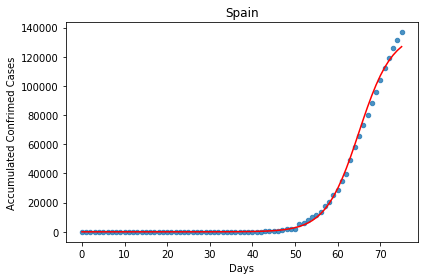

In [66]:
def logistic(x,beta):
  '''
  M: the maximal number of cases 
  alpha: the number of days of 0.5 max(ConfirmedCases),
  beta: the growth parameter
  '''
  M = df_country['ConfirmedCases'].max()
  half_max_value = round(df_country['ConfirmedCases'].max()/2)
  min_residule = min(abs(ydata - half_max_value))
  alpha = np.where(abs(ydata-half_max_value) == min_residule)[0]
  y = M / (1 + np.exp(-beta * (x - alpha)))
  return y

def logistic_score(y_true,y_pred):
  """
  score = 1 - ((y_true - y_pred) ** 2).sum() /((y_true - y_true.mean()) ** 2).sum()
  """
  u = np.sum(np.power(np.subtract(y_true, y_pred),2))
  v = np.sum(np.power(np.subtract(y_true, np.mean(y_true)),2))
  score = 1 - u/v
  return score

# Initial condition
beta = 0.1

# Curve Fitting
popt, pcov = curve_fit(logistic, xdata, ydata)
y_pred = logistic(xdata, *popt)
score = logistic_score(ydata,y_pred)
print('beta:',popt[0])
print('score:', score)

# Plot
plt.scatter(xdata, ydata, s=20,alpha=0.8)
plt.title(country)
plt.xlabel('Days')
plt.ylabel('Accumulated Confrimed Cases')
plt.plot(xdata, y_pred, 'r')
plt.tight_layout()

**Reference**
*   https://www.kaggle.com/group16/sigmoid-per-country-no-leakage
*   https://ipython-books.github.io/93-fitting-a-function-to-data-with-nonlinear-least-squares/
*   https://en.wikipedia.org/wiki/Logistic_function
*   https://en.wikipedia.org/wiki/Sigmoid_function



**SIR model**

In [0]:
def sir_model(y,x,beta,gamma):
  S,I,R= y
  dS_dt = -beta * S * I / N
  dI_dt = beta * S * I / N - gamma * I
  dR_dt = gamma * I
  return dS_dt, dI_dt, dR_dt

def sir_solution(x, beta, gamma):
  solution = scipy.integrate.odeint(sir_model,(S0,I0,R0),x,args=(beta,gamma))
  S = solution[:,0]
  I = solution[:,1]
  R = solution[:,2]
  return I

def sir_fit(xdata, ydata):
  popt, pcov = curve_fit(sir_solution, xdata, ydata)
  fitted = sir_solution(xdata,*popt)
  return popt, pcov, fitted

def sir_score(y_true,y_pred):
  """
  score = 1 - ((y_true - y_pred) ** 2).sum() /((y_true - y_true.mean()) ** 2).sum()
  """
  u = np.sum(np.power(np.subtract(y_true, y_pred),2))
  v = np.sum(np.power(np.subtract(y_true, np.mean(y_true)),2))
  score = 1 - u/v
  return score

In [68]:
# load dataset
df = pd.read_csv("/content/drive/My Drive/COVID19/train.csv")
df_population = pd.read_csv("/content/drive/My Drive/COVID19/population_by_country_2020.csv")

# Create a new data frame
df_country = pd.DataFrame()

# Check how many confirmed cases for each day. (ConfirmedCases.diff())
# Fill missing value
country  = 'Spain'
df_country['ConfirmedCases'] = df.loc[df['Country_Region']== country].ConfirmedCases.diff().fillna(0)

# Start from the date which has fist infected case
cnt = 0
for i in df_country['ConfirmedCases']:
  if i != 0:
    print(i)
    break
  cnt += 1
df_country= df_country[cnt:]

# Add a new column "day_count"
df_country['day_count'] = list(range(1,len(df_country)+1))

# Input data
ydata = df_country['ConfirmedCases'].to_numpy()
xdata = df_country.day_count

df_country

1.0


,ConfirmedCases,day_count
16502,1.0,1
16503,0.0,2
16504,0.0,3
16505,0.0,4
16506,0.0,5
...,...,...
16563,7947.0,62
16564,7134.0,63
16565,6969.0,64
16566,5478.0,65


beta = 9.681518562424463
gamma = 9.502473690855249
score:  0.9535764487695483


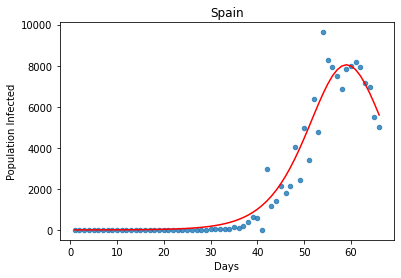

In [69]:
# Initial Condition
N = float(df_population.loc[df_population['Country (or dependency)']== country]["Population (2020)"])
I0 = ydata[0]
S0 = N - I0
R0 = 0.0

# Fitting
popt, pcov, y_pred = sir_fit(xdata,ydata)
print("beta =", popt[0])
print("gamma =", popt[1])

# Score
score = sir_score(ydata,y_pred)
print("score: ", score)

# Plotting
plt.scatter(xdata, ydata, s=20, alpha=0.8)
plt.plot(xdata, y_pred, 'r')
plt.title(country)
plt.ylabel("Population Infected")
plt.xlabel("Days")
plt.show()

**Reference**
*   https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-the-differential-equation-model
*   https://www.kaggle.com/saga21/covid-global-forecast-sir-model-ml-regressions
*   https://arxiv.org/pdf/2003.00122.pdf



